*Topics in Data Science 2 WS 23/24*
# Programming Assignment 4 - Flower Classification

In this programming assignment, you will apply your new deep learning knowledge on image classification.

First, you need to import all the necessary packages for this assignment.

In [1]:
from fastai.vision.all import *
import pandas as pd

## Introduction and Dataset

You are provided with the [OXFORD 102 FLOWERS Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/) by Nilsback et al. 2008. The flower dataset consists of 102 different flower categories, with each category containing 40 to 258 images.
The complete dataset is provided via fastai and can be downloaded using the `untar_data` function and *FLOWERS* as URL  parameter (https://docs.fast.ai/data.external.html#untar_data).

In [2]:
path = untar_data(URLs.FLOWERS)
path.ls()

(#4) [Path('/root/.fastai/data/oxford-102-flowers/test.txt'),Path('/root/.fastai/data/oxford-102-flowers/train.txt'),Path('/root/.fastai/data/oxford-102-flowers/jpg'),Path('/root/.fastai/data/oxford-102-flowers/valid.txt')]

## Preparing the Dataset
This time, we have created the DataFrame for you with the following code. You can use the DataFrame by using the variable df.
The DataFrame contains three columns. A column for the image path, a column for the image label, and a boolean indicator if the image is part of the training or validation set.



In [3]:
import json
import requests
url = 'https://raw.githubusercontent.com/GuntherGust/tds2_data/main/data/cat_to_name.json'
response = requests.get(url)
categories = response.json()
categories
entries = []
# We will use test as our train images
train = pd.read_csv(path/"test.txt", header=None, sep= " ")
for row_index in train.index:
  entries.append({"fname":str(path)+"/"+train.iloc[row_index][0],"label":categories[str(train.iloc[row_index][1]+1)],"is_valid":False})

# We will use train as our test images
test = pd.read_csv(path/"train.txt", header=None, sep= " ")
for row_index in test.index:
  entries.append({"fname":str(path)+"/"+train.iloc[row_index][0],"label":categories[str(train.iloc[row_index][1]+1)],"is_valid":True})
df = pd.DataFrame(entries)
df

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

fname  \
0     /root/.fastai/data/oxford-102-flowers/jpg/image_06977.jpg   
1     /root/.fastai/data/oxford-102-flowers/jpg/image_00800.jpg   
2     /root/.fastai/data/oxford-102-flowers/jpg/image_05038.jpg   
3     /root/.fastai/data/oxford-102-flowers/jpg/image_06759.jpg   
4     /root/.fastai/data/oxford-102-flowers/jpg/image_01133.jpg   
...                                                         ...   
7164  /root/.fastai/data/oxford-102-flowers/jpg/image_00617.jpg   
7165  /root/.fastai/data/oxford-102-flowers/jpg/image_02585.jpg   
7166  /root/.fastai/data/oxford-102-flowers/jpg/image_07960.jpg   
7167  /root/.fastai/data/oxford-102-flowers/jpg/image_00282.jpg   
7168  /root/.fastai/data/oxford-102-flowers/jpg/image_07864.jpg   

                 label  is_valid  
0     alpine sea holly     False  
1           frangipani     False  
2        orange dahlia     False  
3        pink primrose     False  
4           wallflower     False  
...                ...       ...  
7164        watercress      True  
7165         columbine      True  
7166   trumpet creeper      True  
7167        water lily      True  
7168          bromelia      True  

[7169 rows x 3 columns]

## Creating the Dataloaders

Use the [data block API](https://docs.fast.ai/data.block.html#DataBlock) to load the data using your `DataFrame`

1. Define the blocks
1. Define the `get_x`and `get_y` using the `ColReader()` function (see [docs](https://docs.fast.ai/data.transforms.html#colreader) or [example](https://docs.fast.ai/tutorial.vision.html#Multi-label-classification---With-the-data-block-API))
1. Split the images regarding your flag of the train and test set [ColSplitter](https://docs.fast.ai/data.transforms.html#colsplitter)
1. Define suitable [transforms](https://docs.fast.ai/vision.augment.html#aug_transforms)  

In [39]:
flowers = DataBlock(blocks=(ImageBlock,CategoryBlock),
                    get_x=ColReader("fname"),
                    get_y=ColReader("label"),
                    splitter=ColSplitter(),
                    item_tfms= Resize(460),
                    batch_tfms= aug_transforms(size=256))

**5. Create the dataloaders from the `DataFrame`**

In [40]:
dataloader = flowers.dataloaders(df)

**Now, use the Dataloaders to display three rows of random pictures from a batch.**

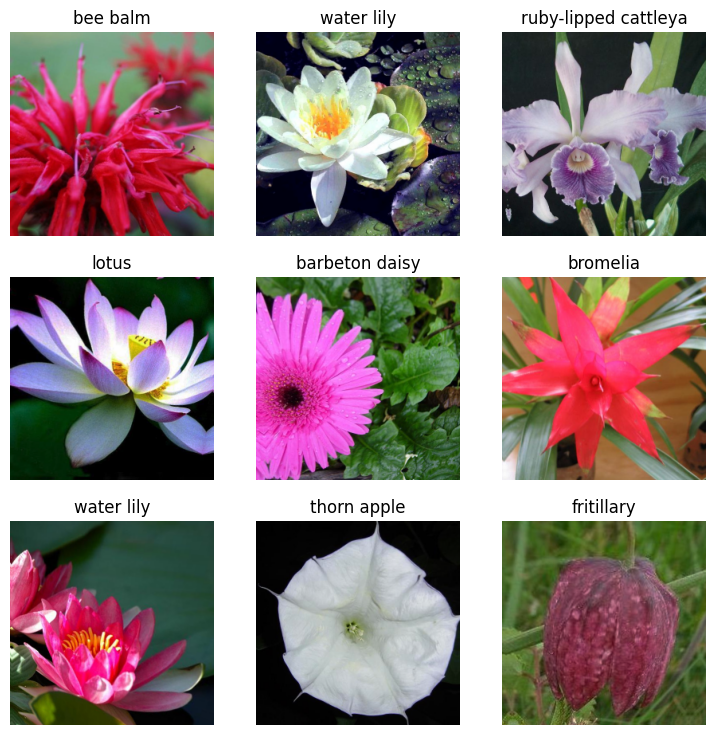

In [16]:
dataloader.show_batch()

How many flower classes are in the dataset?

__Hint__: use `dls.vocab`

## Train the Model

Once the data is ready you can start training a model. Use the `cnn_learner` to create a model with
- a Resnet34 architecture
- the metrics *accuracy* and [*top-5 accuracy*](https://docs.fast.ai/metrics.html#top_k_accuracy)

In [21]:
learner = vision_learner(dataloader,models.resnet34, metrics=[accuracy,top_k_accuracy]).to_fp16()

Finally, you can train the model. Apply the concepts from the lecture, i.e.,
- finding the learning rate
- training the last layers
- unfreezing the model
- train all layers (learning rate rule of thumb!)

Always provide an explanation **why** you chose the number of epochs and the learning rate.

Save the model after each training
```
learn.save('stage-x')
```
so that you can reload the model
```
learn = learn.load('stage-x')
```
if something goes wrong. If you load a model with *freezed* layers, you need to *unfreeze* the layers again.

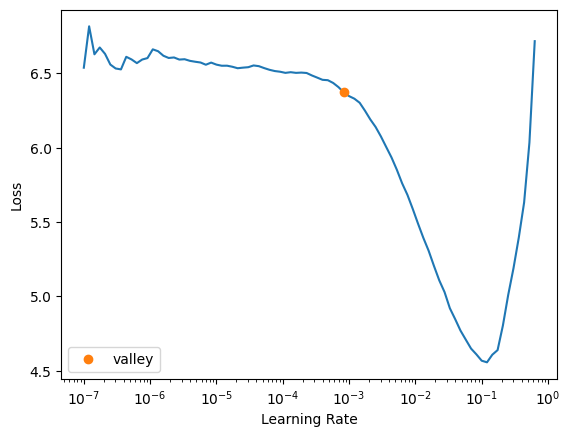

In [23]:
lr = learner.lr_find()

In [24]:
learner.fit_one_cycle(20, lr_max=lr.valley, cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=3, comp=np.greater),
                                           SaveModelCallback(monitor='accuracy', min_delta=0.01, comp=np.greater, fname='best_frozen_model')])

Better model found at epoch 0 with accuracy value: 0.1039215698838234.
Better model found at epoch 1 with accuracy value: 0.6186274290084839.
Better model found at epoch 2 with accuracy value: 0.8794117569923401.
Better model found at epoch 3 with accuracy value: 0.9578431248664856.
Better model found at epoch 4 with accuracy value: 0.9803921580314636.
Better model found at epoch 5 with accuracy value: 0.9911764860153198.
No improvement since epoch 5: early stopping


In [47]:
learner = learner.load('best_frozen_model')

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


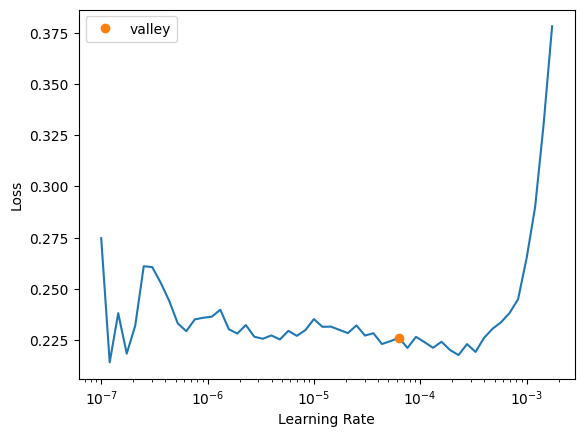

In [48]:
learner.unfreeze()
lr = learner.lr_find()

In [49]:
learner.fit_one_cycle(
    20, lr_max=slice(lr.valley,lr.valley*10),
    cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=3, comp=np.greater),
         SaveModelCallback(monitor='accuracy', comp=np.greater, fname='best_model')]
         )

Better model found at epoch 0 with accuracy value: 0.9950980544090271.
Better model found at epoch 1 with accuracy value: 0.9960784316062927.
No improvement since epoch 0: early stopping


In [50]:
learner = learner.load('best_model')

## Result Interpretation






Explain the difference betweeen the metrics *accuracy* and *top_5_accuracy*. Why can it be useful to report both metrics?

In [ ]:
# Write your answer here
# Top-1 accuracy is the conventional accuracy: the model answer
# (the one with highest probability) must be exactly the expected answer.
# Top-5 accuracy means that any of your model 5 highest probability answers
# must match the expected answer.
# Depending on the problem, both metrics can provide useful insights about
# the model's performance

Use the [ClassificationInterpretation](https://docs.fast.ai/interpret.html) to analyze the results in more detail. What are your main findings?

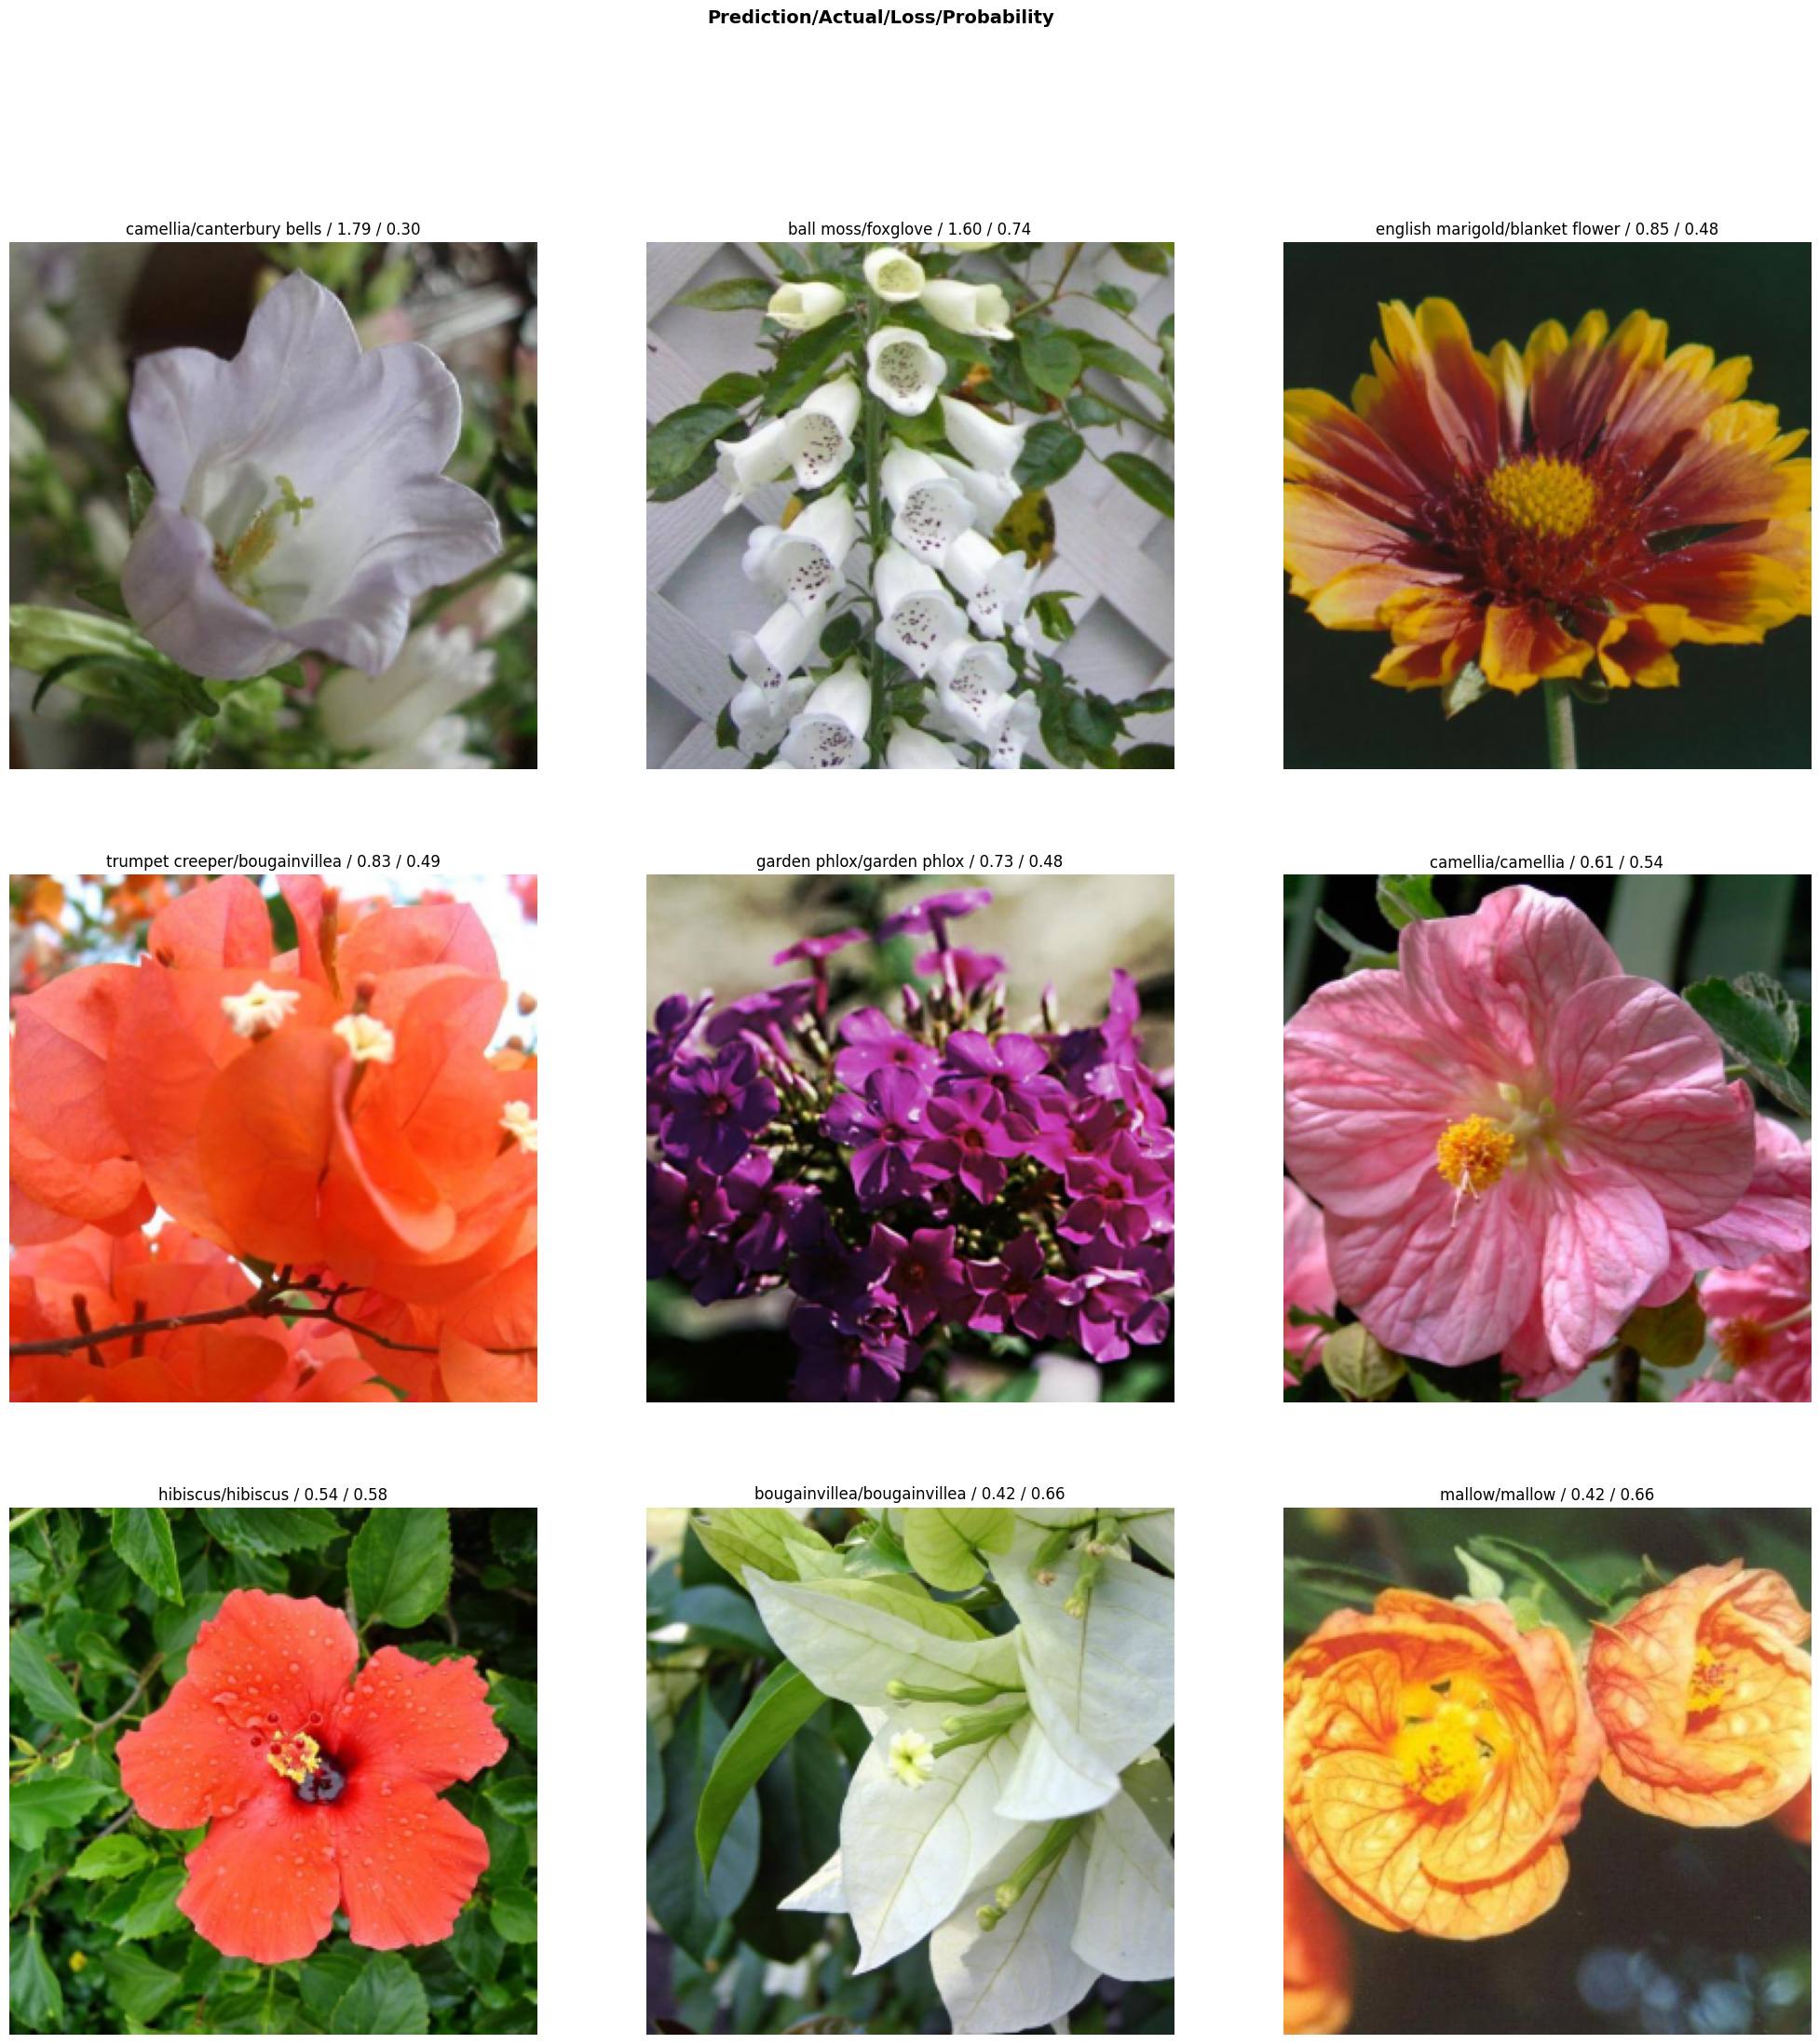

In [51]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses(9, figsize=(25,25))